Here we merge, analyse and classify two playlists using Decision Trees, then Random Forests. 

It's worth considering that the two playlists - the Billboard Hot 100 for June 10, 2020 - and my PopConnoisseur playlist - are not worlds apart, both featuring pop music in the broadest sense. Nonetheless there are differences.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
pcdf = pd.read_excel('pc_data.xlsx', usecols = "B:S")

In [87]:
pcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      362 non-null    float64
 1   energy            362 non-null    float64
 2   key               362 non-null    int64  
 3   loudness          362 non-null    float64
 4   mode              362 non-null    int64  
 5   speechiness       362 non-null    float64
 6   acousticness      362 non-null    float64
 7   instrumentalness  362 non-null    float64
 8   liveness          362 non-null    float64
 9   valence           362 non-null    float64
 10  tempo             362 non-null    float64
 11  type              362 non-null    object 
 12  id                362 non-null    object 
 13  uri               362 non-null    object 
 14  track_href        362 non-null    object 
 15  analysis_url      362 non-null    object 
 16  duration_ms       362 non-null    int64  
 1

In [88]:
pcdf.drop(['key','mode','track_href','instrumentalness','analysis_url','time_signature','uri','type','id'],axis=1,inplace=True)

Let's create a column indicating that this is the PopConnoisseur playlist.

In [89]:
pcdf['playlist']=1

In [90]:
pcdf.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms,playlist
0,0.462,0.715,-6.829,0.0454,0.11800,0.0592,0.237,99.763,166788,1
1,0.678,0.607,-7.190,0.0750,0.17400,0.0788,0.445,91.973,204418,1
2,0.623,0.840,-3.944,0.0799,0.04730,0.1070,0.788,162.062,251627,1
3,0.555,0.423,-6.232,0.0440,0.79900,0.1120,0.257,137.044,202147,1
4,0.420,0.879,-4.916,0.0568,0.00729,0.1800,0.432,128.913,279000,1


Let's load in the Billboard Hot 100 playlist.

In [91]:
bbdf = pd.read_excel('bb_data.xlsx', usecols = "B:S")

Let's create a column indicating that this is the Billboard Hot 100 playlist.

In [92]:
bbdf['playlist']=0

In [94]:
bbdf.drop(['key','mode','track_href','instrumentalness','analysis_url','time_signature','uri','type','id'],axis=1,inplace=True)

In [95]:
bbdf.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms,playlist
0,0.672,0.855,-3.764,0.0397,0.02100,0.3230,0.646,123.056,182200,0
1,0.822,0.743,-4.772,0.2800,0.01600,0.1270,0.636,84.459,242001,0
2,0.746,0.690,-7.956,0.1640,0.24700,0.1010,0.497,89.977,181733,0
3,0.514,0.730,-5.934,0.0598,0.00146,0.0897,0.334,171.005,200040,0
4,0.856,0.641,-4.640,0.2040,0.11900,0.4270,0.745,111.004,206221,0


Now let's merge the two DataFrames.

In [96]:
frames = [pcdf, bbdf]
alldf = pd.concat(frames)

In [97]:
print(alldf)

    danceability  energy  loudness  speechiness  acousticness  liveness  \
0          0.462   0.715    -6.829       0.0454       0.11800    0.0592   
1          0.678   0.607    -7.190       0.0750       0.17400    0.0788   
2          0.623   0.840    -3.944       0.0799       0.04730    0.1070   
3          0.555   0.423    -6.232       0.0440       0.79900    0.1120   
4          0.420   0.879    -4.916       0.0568       0.00729    0.1800   
..           ...     ...       ...          ...           ...       ...   
95         0.708   0.186    -8.953       0.0422       0.86800    0.0779   
96         0.817   0.513    -6.263       0.3940       0.38000    0.1090   
97         0.793   0.536    -7.624       0.1030       0.07040    0.1710   
98         0.837   0.663    -6.434       0.3340       0.07620    0.0941   
99         0.674   0.774    -7.567       0.0892       0.06860    0.3930   

    valence    tempo  duration_ms  playlist  
0     0.237   99.763       166788         1  
1     0

In [98]:
from sklearn.model_selection import train_test_split

Text(0.5, 0, 'Playlist')

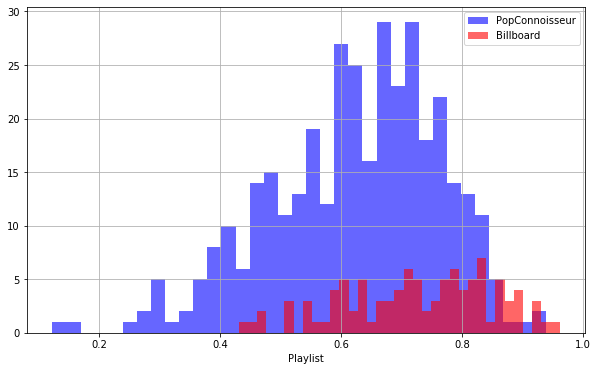

In [100]:
plt.figure(figsize=(10,6))
alldf[alldf['playlist']==1]['danceability'].hist(bins=35, color='blue',label='PopConnoisseur',alpha=0.6)
alldf[alldf['playlist']==0]['danceability'].hist(bins=35, color='red',label='Billboard',alpha=0.6)
plt.legend()
plt.xlabel('Playlist')

Now let's train/test/split to predict the playlist value, i.e. which playlist is a given song in.

In [101]:
X = alldf.drop('playlist',axis=1)
y = alldf['playlist']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

First we'll use Decision Trees.

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtree = DecisionTreeClassifier()

In [105]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
predictions = dtree.predict(X_test)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44        34
           1       0.82      0.82      0.82       105

    accuracy                           0.73       139
   macro avg       0.63      0.63      0.63       139
weighted avg       0.73      0.73      0.73       139



In [109]:
print(confusion_matrix(y_test,predictions))

[[15 19]
 [19 86]]


In [ ]:
A weighted average of 73 isn't bad, and the confusion matrix looks ok.

Now let's try random forests.

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
rfc_pred = rfc.predict(X_test)

In [113]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.62      0.29      0.40        34
           1       0.80      0.94      0.87       105

    accuracy                           0.78       139
   macro avg       0.71      0.62      0.63       139
weighted avg       0.76      0.78      0.75       139



In [112]:
print(confusion_matrix(y_test,rfc_pred))

[[10 24]
 [ 6 99]]


This f1-score and confusion matrix result is a bit better across the board. There has been a lot written about adjusting Random Forect hyperparameters. I've just gone with defaults/"typical" values here, but it could be worth some experimentation in the future, along the lines of this article:

https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6